In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train['train']=1
test['train']=0
test['Survived']=np.NaN

In [125]:
completedata=pd.concat([train,test])

# Data Exploration

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


Age and Cabin have some null values

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20,1.00
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69,0.00
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00,1.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91,1.00
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45,1.00
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00,1.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33,1.00


In [7]:
train_num=train[["Age","SibSp","Parch","Fare"]]
train_cat=train[["Survived","Sex","Ticket","Fare","Cabin","Embarked","Pclass"]]

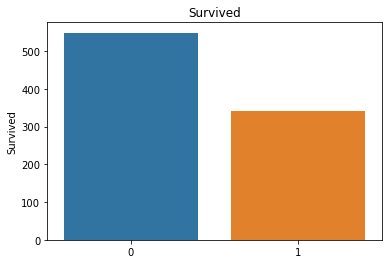

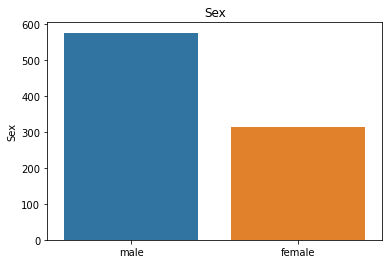

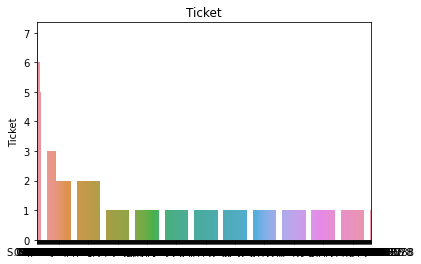

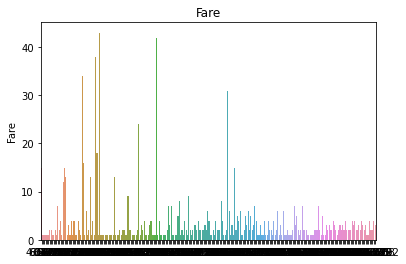

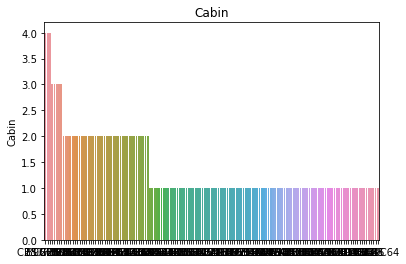

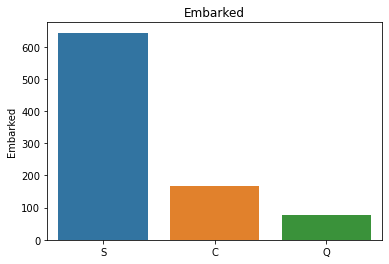

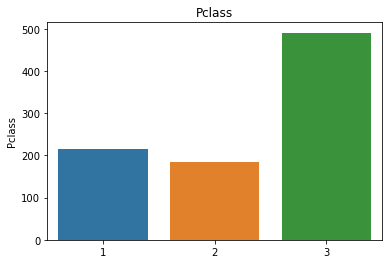

In [8]:
for c in train_cat.columns : 
    sns.barplot(train_cat[c].value_counts().index,train_cat[c].value_counts()).set_title(c)
    plt.show()

In [9]:
sns.set()

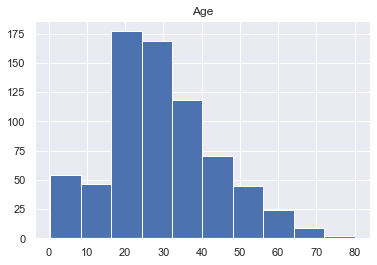

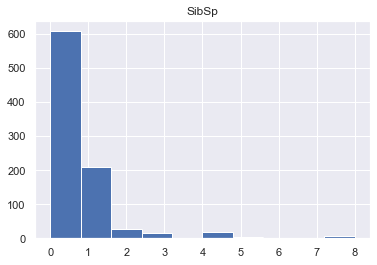

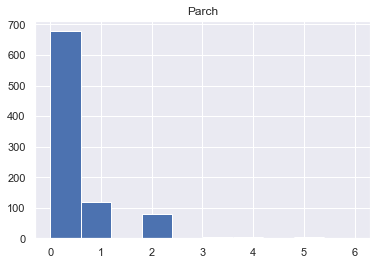

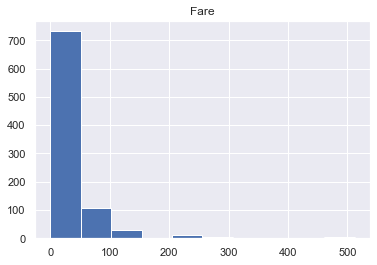

In [10]:
for c in train_num.columns :
    plt.hist(train_num[c])
    plt.title(c)
    plt.show()

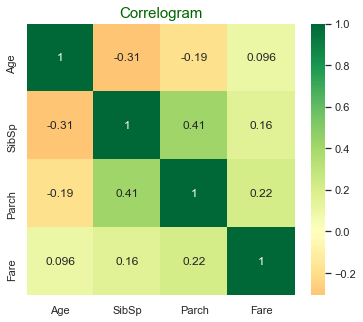

In [11]:
# correlations between features
corr = train_num.corr()
plt.figure(figsize = (6, 5))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [12]:
pd.pivot_table(train,index="Survived",values=["Pclass","Age","SibSp","Parch","Fare"])

,Age,Fare,Parch,Pclass,SibSp
Survived,,,,,
0,30.63,22.12,0.33,2.53,0.55
1,28.34,48.40,0.46,1.95,0.47


Feature engineering can be beneficial for the "Cabin" and "Tickets" variables since they contain a lot of messy and unorganized data.

# Feature Engineering 

In [13]:
train['cabin_multiple']=train.Cabin.apply(lambda x:0 if pd.isna(x) else len(x.split(' ')))
train['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [14]:
pd.pivot_table(train,index="Survived", columns='cabin_multiple',values='Ticket',aggfunc='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.00,58.00,7.00,3.00,NaN
1,206.00,122.00,9.00,3.00,2.00


In [15]:
train['cabin_adv']=train.Cabin.apply(lambda x :str(x)[0])

In [16]:
print(train.cabin_adv.value_counts())
pd.pivot_table(train,index="Survived", columns='cabin_adv',values='Ticket',aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.00,12.00,24.00,8.00,8.00,5.00,2.00,1.00,481.00
1,7.00,35.00,35.00,25.00,24.00,8.00,2.00,NaN,206.00


In [17]:
train['numeric_ticket']=train.Ticket.apply(lambda x :1 if x.isnumeric() else 0)
train['ticcket_letters']=train.Ticket.apply(lambda x : ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1])>0 else 0)

In [18]:
train['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [19]:
pd.set_option("max_rows",None)
train['ticcket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
c              5
fcc            5
sopp           3
pp             3
wep            3
scah           2
ppp            2
swpp           2
sotono2        2
sca4           1
sp             1
scahbasle      1
fc             1
scow           1
sc             1
sop            1
as             1
fa             1
casoton        1
Name: ticcket_letters, dtype: int64

In [20]:
train['Name_title']=train.Name.apply(lambda x:x.split(',')[1].split('.')[0].strip())

In [21]:
train['Name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Lady              1
Don               1
Jonkheer          1
Sir               1
the Countess      1
Mme               1
Ms                1
Capt              1
Name: Name_title, dtype: int64

In [22]:
pd.pivot_table(train,index="Survived", columns='Name_title',values='Ticket',aggfunc='count')

Name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.00,1.00,1.00,4.00,1.00,NaN,1.00,17.00,55.00,NaN,NaN,436.00,26.00,NaN,6.00,NaN,NaN
1,NaN,1.00,NaN,3.00,NaN,1.00,1.00,23.00,127.00,2.00,1.00,81.00,99.00,1.00,NaN,1.00,1.00


# Data Preprocessing

Performing feature engineering on the entire dataset

In [23]:
completedata['cabin_multiple']=completedata.Cabin.apply(lambda x:0 if pd.isna(x) else len(x.split(' ')))
completedata['cabin_adv']=completedata.Cabin.apply(lambda x :str(x)[0])
completedata['numeric_ticket']=completedata.Ticket.apply(lambda x :1 if x.isnumeric() else 0)
completedata['ticcket_letters']=completedata.Ticket.apply(lambda x : ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1])>0 else 0)
completedata['Name_title']=completedata.Name.apply(lambda x:x.split(',')[1].split('.')[0].strip())

In [57]:
completedatacopy=completedata.copy()

In [56]:
completedatacopy.Age=completedatacopy.Age.fillna(train.Age.mean())

In [58]:
#Drop nulls for Embarked (only 2)
completedatacopy.dropna(subset=['Embarked'],inplace=True)

In [59]:
completedatacopy.isna().sum()

PassengerId           0
Survived            418
Pclass                0
Name                  0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  1
Cabin              1014
Embarked              0
train                 0
cabin_multiple        0
cabin_adv             0
numeric_ticket        0
ticcket_letters       0
Name_title            0
dtype: int64

In [60]:
completedatacopy=pd.DataFrame(completedatacopy)

In [61]:
completedatacopy[completedatacopy['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train,cabin_multiple,cabin_adv,numeric_ticket,ticcket_letters,Name_title
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.50,0,0,3701,NaN,NaN,S,0,0,n,1,0,Mr


In [62]:
completedatacopy[completedatacopy['Pclass']==3]['Fare'].mean()

13.302888700564969

In [63]:
completedatacopy.loc[completedatacopy['PassengerId'] ==1044, 'Fare'
    ]=completedatacopy[completedatacopy['Pclass']==3]['Fare'].mean()

In [64]:
completedata_dummie=pd.get_dummies(completedatacopy[[ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Embarked',
       'cabin_adv','Name_title','Fare','train']])

In [65]:
train1=completedata_dummie[completedata_dummie.train==1].drop(['train'],axis=1)

test1=completedata_dummie[completedata_dummie.train==0].drop(['train'],axis=1)

# Model  Building 

In [66]:
Xtrain , Xtest , ytrain , ytest =train_test_split(train1.drop(['Survived'],axis=1),train1.Survived,test_size=0.025)

In [67]:
train1.drop(['Survived'],axis=1).shape

(889, 965)

In [68]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(Xtrain, Xtest, ytrain, ytest)

print(models)

100%|██████████| 29/29 [00:06<00:00,  4.35it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.96               0.94     0.94      0.96   
LogisticRegression                 0.96               0.94     0.94      0.96   
XGBClassifier                      0.96               0.94     0.94      0.96   
RidgeClassifierCV                  0.96               0.94     0.94      0.96   
RidgeClassifier                    0.96               0.94     0.94      0.96   
RandomForestClassifier             0.96               0.94     0.94      0.96   
PassiveAggressiveClassifier        0.96               0.94     0.94      0.96   
LinearSVC                          0.96               0.94     0.94      0.96   
LGBMClassifier                     0.96               0.94     0.94      0.96   
ExtraTreesClassifier               0.96               0.94     0.94      0.96   
CalibratedClassifierCV      

After comparing those results, we can apply optimization techniques to the Random Forest classifier to further improve its performance.

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
clf=RandomForestClassifier(n_estimators= 200)
clf.fit(train1.drop(['Survived'],axis=1), train1.Survived)

RandomForestClassifier(n_estimators=200)

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
clf=LogisticRegression(random_state=0)
clf.fit(Xtrain, ytrain)
clf.score(Xtest,ytest)

0.9565217391304348

# Feature Importance

<AxesSubplot:>

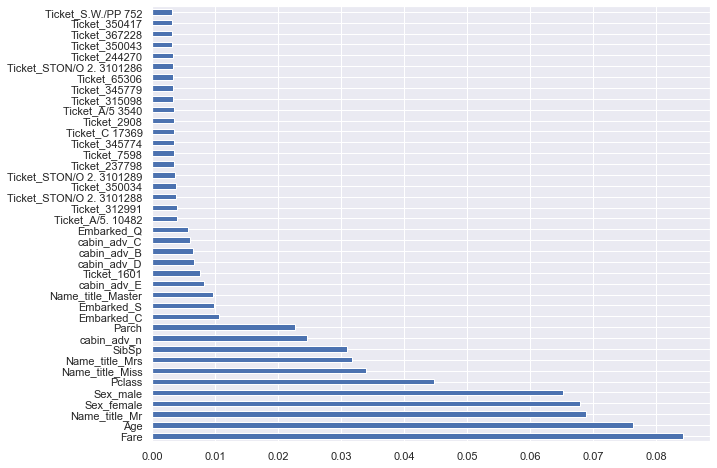

In [88]:
plt.figure(figsize=(10,8))
feat_importances=pd.Series(clf.feature_importances_,Xtrain.columns)
feat_importances.nlargest(40).plot(kind='barh')

In [141]:
pred=clf.predict(test1.drop(['Survived'],axis=1))

In [142]:
test1.shape

(418, 974)

In [143]:
my_int_list = [int(x) for x in pred]

In [144]:
ss=pd.DataFrame({'PassengerId':test.PassengerId,'Survived':my_int_list})

In [145]:
ss.to_csv('sub.csv',index=False)

In [146]:
ss.sum()

PassengerId    460009
Survived          188
dtype: int64

# More feature engineering on Age

The missing data in age was categorized as a category. For the remaining non-missing values, one way to categorize them is by manually defining the number of age bins and the bin size.

In [126]:
# Define a function to create age bins
def categorize_age(input_data, age_bin_size):
    i = 'a'
    for a in range(0,91,age_bin_size):
        input_data.loc[(input_data['Age'] >= a) & (input_data['Age'] < a+age_bin_size),'age bin'] = i + '. [' + str(a) + ',' + str(a+age_bin_size) + ')'
        i = chr(ord(i) + 1)
    input_data.loc[(input_data['Age'].isna()), 'age bin'] = 'null'

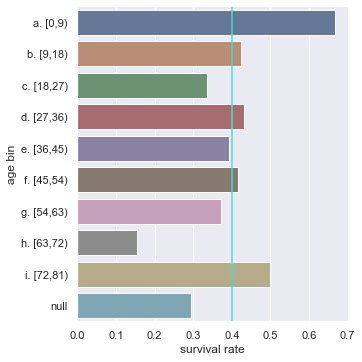

In [127]:
# Create 9 age bins 
df = completedata.copy()
df['age bin'] = None
categorize_age(df,9)

age_dist = df.groupby(['age bin'])['Survived'
                                  ].describe().reset_index().sort_values('age bin')
g = sns.catplot(y='age bin', x='mean', 
               data=age_dist, saturation=.5, kind='bar', ci=None)
g.set_xlabels('survival rate')
plt.axvline(0.4, 0, 3, color='turquoise');

In [128]:
df.loc[df['PassengerId'] ==1044, 'Fare'
    ]=df[df['Pclass']==3]['Fare'].mean()

In [129]:
#Drop nulls for Embarked (only 2)
df.dropna(subset=['Embarked'],inplace=True)

In [130]:
completedata_dummie=pd.get_dummies(df[[ 'Survived', 'Pclass', 'Sex', 'SibSp',
       'Parch', 'Ticket', 'Embarked','Fare',
       'cabin_adv','Name_title','age bin','train']])

In [131]:
train1=completedata_dummie[completedata_dummie.train==1].drop(['train'],axis=1)

test1=completedata_dummie[completedata_dummie.train==0].drop(['train'],axis=1)

In [132]:
train1.drop(['Survived'],axis=1).shape

(889, 973)

In [136]:
Xtrain , Xtest , ytrain , ytest =train_test_split(train1.drop(['Survived'],axis=1),train1.Survived,test_size=0.5)

In [137]:
ytest.shape

(445,)

In [138]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(Xtrain, Xtest, ytrain, ytest)

print(models)

100%|██████████| 29/29 [00:04<00:00,  7.22it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.84               0.81     0.81      0.83   
RidgeClassifierCV                  0.82               0.81     0.81      0.82   
PassiveAggressiveClassifier        0.82               0.81     0.81      0.82   
ExtraTreesClassifier               0.83               0.80     0.80      0.82   
RidgeClassifier                    0.82               0.80     0.80      0.82   
LogisticRegression                 0.82               0.80     0.80      0.82   
LinearSVC                          0.82               0.80     0.80      0.81   
AdaBoostClassifier                 0.82               0.80     0.80      0.82   
LinearDiscriminantAnalysis         0.81               0.79     0.79      0.81   
CalibratedClassifierCV             0.81               0.79     0.79      0.81   
LGBMClassifier              

In [139]:
clf=RandomForestClassifier(n_estimators= 100)
clf.fit(train1.drop(['Survived'],axis=1), train1.Survived)
clf.score(Xtest,ytest)

1.0

In [408]:
from sklearn.tree import DecisionTreeClassifier

In [420]:
clf=DecisionTreeClassifier(random_state=0)
clf.fit(Xtrain, ytrain)
clf.score(Xtest,ytest)

0.8260869565217391

<AxesSubplot:>

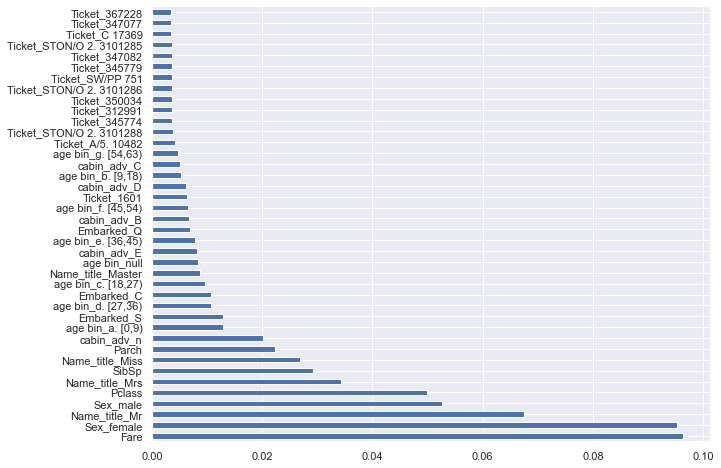

In [140]:
plt.figure(figsize=(10,8))
feat_importances=pd.Series(clf.feature_importances_,Xtrain.columns)
feat_importances.nlargest(40).plot(kind='barh')